# 线性回归
## 简单介绍

在这个编程练习里，你需要学会运用线性回归和利用可视化方式看看线性回归是怎么生效的。<br>开始练习之前，建议把相关网课都过一遍，并且相关问题都要确保搞懂。（因为吴恩达老师的课程是使用Octave和MATLAB，我们使用Python，所以一些编程语言相关的内容可能会有差异，重要的是理解代码背后的思想）

## 数据集说明

ex1data1.txt——单个变量的数据集
<br>ex1data2.txt——多个变量的数据集（实际上是两个变量）

# 1 简单代码练习

输出5 * 5单位矩阵

In [612]:
#引入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [613]:
#单位矩阵一般代号为I，与eye同音
A=np.eye(5)
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# 2 单变量线性回归

假设你是一个连锁餐饮品牌的CEO，你在考虑在哪些城市开分店能获得更大的收益，然后你有一个有关城市人口和收益的数据集（ex1data1.txt，第一列是人口，第二列是收益），你要通过线性回归来预测下一个要开分店的城市。

## 2.1 绘制数据

In [614]:
dataset='dataset/ex1data1.txt'
data = pd.read_csv(dataset, header=None, names=['PopulationX_1', 'Profit'])
print(len(data))
data.head()

97


,PopulationX_1,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


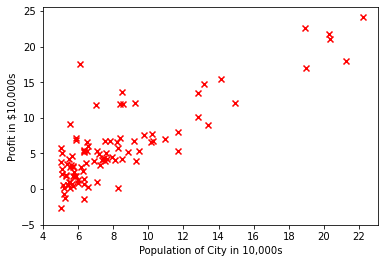

In [615]:
#Matplotlib教程 https://www.runoob.com/matplotlib/matplotlib-tutorial.html

#横坐标是城市人口
x=np.array([data.PopulationX_1])
#纵坐标是小吃店收益
y=np.array([data.Profit])
plt.scatter(x,y,marker='x',c='red')

# plt.xlim(4,24)
# plt.ylim(-5,25)
#设置坐标刻度，与ex1.pdf文件保持一致
plt.yticks([-5,0,5,10,15,20,25])
plt.xticks([4,6,8,10,12,14,16,18,20,22])
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

## 2.2 梯度下降

这个部分，你需要对数据集使用梯度下降法来求得线性回归参数$\theta$（向量，包括$\theta _{0}$和$\theta _{1}$）<br>（tips：公式两端要有$，编辑可以使用工具 https://www.latexlive.com/home## ）

### 2.2.1 更新方程式

代价函数公式<br>$J(\theta)=\frac{1}{2 m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}$<br>（假设函数的输出和实际输出的平均方差）

$\theta =\begin{bmatrix}
  \theta _{0}&\theta _{1}
\end{bmatrix}$

$x=\begin{bmatrix}
  x_{0}&x _{1}
\end{bmatrix}$（$x_{0}=1）$

$h_{\theta}(x)=\theta^Tx=\theta_0+\theta_1x_1$

在批量（batch）梯度下降中，每次迭代对所有参数进行如下更新<br>$\theta_j=\theta_j-\alpha\frac{1}{m} \sum_{i=1}^{m} ({h(\theta )^{(i)}-y^{(i)}})x_j^{(i)}$

注意：在代码实现的时候，因为要考虑$\theta_0$，所以我们需要对数据集中的输入x增加一列1。

### 2.2.2 变量

In [616]:
#增加x_0=1
data.insert(0, 'X_0', 1)
data.head()

,X_0,PopulationX_1,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [617]:
#前两列赋值给输入矩阵X
#numpy中array可以是多维的，但matrix必须是2维的，matrix是array的子集
X=np.array(data.iloc[:,0:2])
#最后一列赋值给输出向量y
y=np.array(data.iloc[:,2:3])

In [618]:
#theta初始值赋为0
theta=np.zeros(2)
#迭代次数
iterations=1500
#学习率
alpha=0.01
#代价函数迭代数据
cost=np.array([])

### 2.2.3 计算代价函数

In [619]:
#代价函数计算
def computeCost(X,theta,y):
    h=np.dot(X,theta.T)
    m=len(X)
    h=h.reshape(m,1)
#     print(h-y)
#     print((np.power((h-y),2)))
    cost=((np.power((h-y),2)).sum())/(2*m)
#     print(cost)
    return cost

In [620]:
computeCost(X,theta,y)

32.072733877455676

### 2.2.4 梯度下降

In [621]:
#梯度下降函数
def gradientDescent(X,theta,y,alpha,iterations,cost):
    m=len(X)
    for i in range(iterations):
        h=np.dot(X,theta.T)
        h=h.reshape(m,1)
        error=h-y
        
        for j in range(len(theta)):
            delta=((np.multiply(error,X[:,j].reshape(m,1))).sum())*alpha/m
            theta[j]=theta[j]-delta
            
        cost=np.append(cost,computeCost(X,theta,y))
    
#     print(cost)
    lastCost=computeCost(X,theta,y)
    return theta,cost,lastCost
            

In [622]:
theta,cost,lastCost=gradientDescent(X,theta,y,alpha,iterations,cost)
print(theta)
print(len(cost))
print(lastCost)

[-3.63029144  1.16636235]
1500
4.483388256587726


观察代价函数是否随着迭代次数的增加而减少

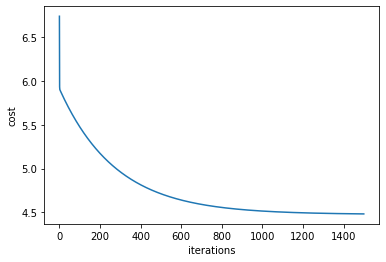

In [623]:
#横坐标是迭代次数
x=np.array(range(iterations))
#纵坐标是代价函数
y=cost
plt.plot(x,y)

# plt.xlim(4,24)
# plt.ylim(-5,25)
#设置坐标刻度，与ex1.pdf文件保持一致
# plt.yticks([-5,0,5,10,15,20,25])
# plt.xticks([4,6,8,10,12,14,16,18,20,22])
plt.xlabel("iterations")
plt.ylabel("cost")
plt.show()

## 2.3 调试

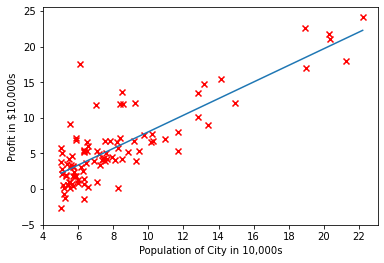

In [624]:
#横坐标是城市人口
x1=np.array([data.PopulationX_1])
#纵坐标是小吃店收益
y1=np.array([data.Profit])
plt.scatter(x1,y1,marker='x',c='red')

x2=np.linspace(data.PopulationX_1.min(), data.PopulationX_1.max(), 100)
y2=theta[0]+x2*theta[1]
plt.plot(x2,y2)

# plt.xlim(4,24)
# plt.ylim(-5,25)
#设置坐标刻度，与ex1.pdf文件保持一致
plt.yticks([-5,0,5,10,15,20,25])
plt.xticks([4,6,8,10,12,14,16,18,20,22])
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()